# TMDB Box Office Prediction (Kaggle competition)

### Problem statement
Built a regression model to predict the worldwide box office revenue based on metadata on over 7,000 past films
from The Movie Database (TMDb). <br>
- Train data: 3000 films
- Test data: 4398 films

### Result
- The pretictive model produce a RMSLE score = 1.94524 (top 30%)
- Leaderboard: https://www.kaggle.com/c/tmdb-box-office-prediction/leaderboard

### Reference
1. https://www.kaggle.com/c/tmdb-box-office-prediction
<br>
<br>
<br>

In [1]:
import warnings
warnings.filterwarnings(action='ignore')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

%matplotlib inline

In [3]:
plt.style.use('seaborn-muted')
sns.set_style('whitegrid')
# mpl.rcParams['figure.dpi'] = 100
mpl.rcParams['figure.figsize'] = (11, 8)
mpl.rcParams['figure.titlesize'] = 'large'
mpl.rcParams['legend.fontsize'] = 'medium'
mpl.rcParams['axes.labelsize'] = 14
mpl.rcParams['xtick.labelsize'] = 12
mpl.rcParams['ytick.labelsize'] = 12

## Load data

In [4]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
imdb_bs = pd.read_csv('imdb_features.csv')

In [5]:
train.head()

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
0,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,...,2/20/15,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651
1,2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,...,8/6/04,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435
2,3,NaN,3300000,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,...,10/10/14,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000
3,4,NaN,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,...,3/9/12,122.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000
4,5,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",NaN,tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,1.148070,...,2/5/09,118.0,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Released,NaN,Marine Boy,NaN,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 23 columns):
id                       3000 non-null int64
belongs_to_collection    604 non-null object
budget                   3000 non-null int64
genres                   2993 non-null object
homepage                 946 non-null object
imdb_id                  3000 non-null object
original_language        3000 non-null object
original_title           3000 non-null object
overview                 2992 non-null object
popularity               3000 non-null float64
poster_path              2999 non-null object
production_companies     2844 non-null object
production_countries     2945 non-null object
release_date             3000 non-null object
runtime                  2998 non-null float64
spoken_languages         2980 non-null object
status                   3000 non-null object
tagline                  2403 non-null object
title                    3000 non-null object
Keywords             

In [7]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4398 entries, 0 to 4397
Data columns (total 22 columns):
id                       4398 non-null int64
belongs_to_collection    877 non-null object
budget                   4398 non-null int64
genres                   4382 non-null object
homepage                 1420 non-null object
imdb_id                  4398 non-null object
original_language        4398 non-null object
original_title           4398 non-null object
overview                 4384 non-null object
popularity               4398 non-null float64
poster_path              4397 non-null object
production_companies     4140 non-null object
production_countries     4296 non-null object
release_date             4397 non-null object
runtime                  4394 non-null float64
spoken_languages         4356 non-null object
status                   4396 non-null object
tagline                  3535 non-null object
title                    4395 non-null object
Keywords            

In [8]:
imdb_bs.head()

,imdb_id,budget_imdb,rating_imdb,votes_imdb,director_imdb,runtime_imdb
0,tt2637294,14000000,5.1,34363,Steve Pink,93.0
1,tt0368933,40000000,5.8,67428,Garry Marshall,113.0
2,tt2582802,3300000,8.5,611499,Damien Chazelle,106.0
3,tt1821480,-1,8.1,51646,Sujoy Ghosh,122.0
4,tt1380152,-1,5.8,284,Jong-seok Yoon,118.0


In [9]:
imdb_bs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7398 entries, 0 to 7397
Data columns (total 6 columns):
imdb_id          7398 non-null object
budget_imdb      7398 non-null int64
rating_imdb      7398 non-null float64
votes_imdb       7398 non-null int64
director_imdb    6862 non-null object
runtime_imdb     6978 non-null float64
dtypes: float64(2), int64(2), object(2)
memory usage: 346.9+ KB


## Data cleaning

In [10]:
train = pd.merge(train, imdb_bs, how='left', on='imdb_id')
test = pd.merge(test, imdb_bs, how='left', on='imdb_id')

<br>
Useful information are stored as dictionaries in some columns, e.g. "belongs_to_collection", "genres", "Keywords	", "cast"", "crew", etc.. Need to extract those info from the compound structure of strings.
<br>
<br>

In [11]:
def extract_text(series, label=True):
    symbol = "[{}]:'"
    if type(series)==str:
        temp = [x.split("': ") for x in [z.strip(symbol) for z in series.split(', ')]]
        return [x[1].lstrip("'/") for x in temp if x[0]==label]
    else: None

In [12]:
for col in ['belongs_to_collection','genres','production_companies','Keywords']:
    train[col] = train[col].apply(lambda x: extract_text(x, 'name'))
    test[col] = test[col].apply(lambda x: extract_text(x, 'name'))

In [13]:
train.head()

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,title,Keywords,cast,crew,revenue,budget_imdb,rating_imdb,votes_imdb,director_imdb,runtime_imdb
0,1,[Hot Tub Time Machine Collection],14000000,[Comedy],NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,...,Hot Tub Time Machine 2,"[time travel, sequel, hot tub, duringcreditsst...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651,14000000,5.1,34363,Steve Pink,93.0
1,2,[The Princess Diaries Collection],40000000,"[Comedy, Drama, Family, Romance]",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,...,The Princess Diaries 2: Royal Engagement,"[coronation, duty, marriage, falling in love]","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435,40000000,5.8,67428,Garry Marshall,113.0
2,3,None,3300000,[Drama],http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,...,Whiplash,"[jazz, obsession, conservatory, music teacher,...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000,3300000,8.5,611499,Damien Chazelle,106.0
3,4,None,1200000,"[Thriller, Drama]",http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,...,Kahaani,"[mystery, bollywood, police corruption, crime,...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000,-1,8.1,51646,Sujoy Ghosh,122.0
4,5,None,0,"[Action, Thriller]",NaN,tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,1.148070,...,Marine Boy,None,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970,-1,5.8,284,Jong-seok Yoon,118.0


<br>
Extract information from the columns which values are provided as dictionaries.
<br>
<br>

In [14]:
import re
import string
import nltk
from itertools import chain

In [15]:
display(string.punctuation)

def remove_punc(text):
    text_rmpunc = ''.join([char for char in text if char not in string.punctuation])
    return text_rmpunc

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [16]:
for df in [train, test]:
    df['is_collection'] = np.where(df['belongs_to_collection'].isna(),0,1)
    df.drop('belongs_to_collection', axis=1, inplace=True)
    

In [17]:
def get_dummy_dict_col(df, col):
    if type(df[col][0])==list:
        preset_col = list(set(chain.from_iterable(df[col].fillna(''))))
    else:
        preset_col = list(set(chain(df[col].fillna(''))))
    df_out = pd.DataFrame(data=np.zeros((len(df), len(preset_col)), dtype='float16'), columns=preset_col)
    
    for i in range(len(df)):
        col_list = df.loc[i, col]
        df_out.loc[i, col_list] = 1
    df_out = df_out.add_prefix(str(col)+'_').fillna(0).astype('int8')
    return df_out

In [18]:
collection_train = get_dummy_dict_col(train, 'is_collection')
collection_test = get_dummy_dict_col(test, 'is_collection')

In [19]:
train['is_collection'].value_counts().head(20)

0    2396
1     604
Name: is_collection, dtype: int64

In [20]:
collection_common = list(set(collection_train.columns) & set(collection_test.columns))
collection_train = collection_train[collection_common]
collection_test = collection_test[collection_common]

In [21]:
def get_revenue_stats(df, dummy_feat):
    df2 = pd.concat([df['revenue'], dummy_feat], axis=1)
    dummy_feat_df = pd.DataFrame()
    for col in dummy_feat.columns:
        mask = dummy_feat.loc[:, col].apply(bool)
        dummy_feat_df[col] = df2.loc[mask, ['revenue']].mean()
    dummy_feat_df = dummy_feat_df.T.sort_values(by='revenue',ascending=False)
    return dummy_feat_df

Text(0, 0.5, 'Film collection')

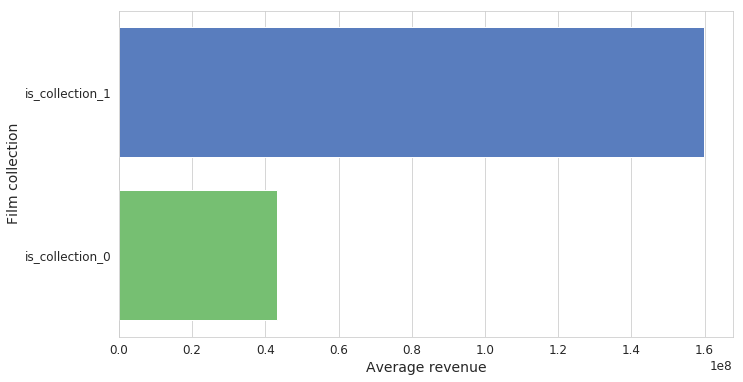

In [22]:
collection_train_df = get_revenue_stats(train, collection_train)[:20]

plt.figure(figsize=(11,6))
g = sns.barplot(x='revenue', y=collection_train_df.index, data=collection_train_df)
plt.xlabel('Average revenue')
plt.ylabel('Film collection')

<br>
The movie is part of a collection or not could be an useful information for revenue (if the prequels are generating good revenue).<br>
Encode collection names from train dataset and map into test dataset.
<br>
<br>

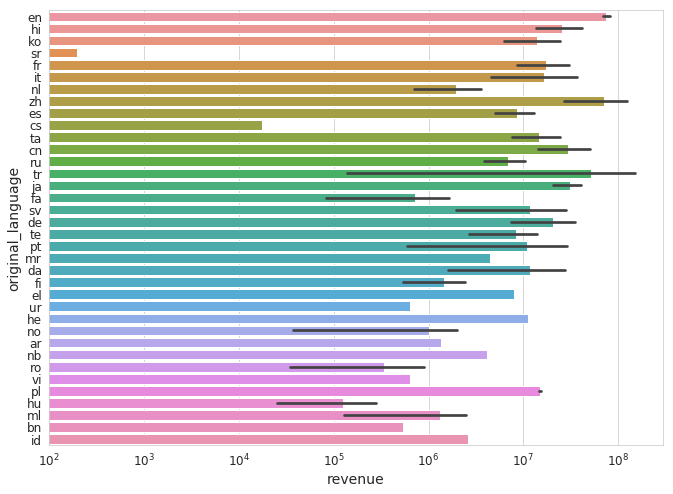

In [23]:
plt.figure(figsize=(11,8))
sns.barplot(x='revenue', y='original_language', data=train)
plt.xscale('log')

In [24]:
train['original_language'].value_counts().head()

en    2575
fr      78
ru      47
es      43
hi      42
Name: original_language, dtype: int64

In [25]:
orig_lang_train = get_dummy_dict_col(train, 'original_language')
orig_lang_test = get_dummy_dict_col(test, 'original_language')

Text(0, 0.5, '')

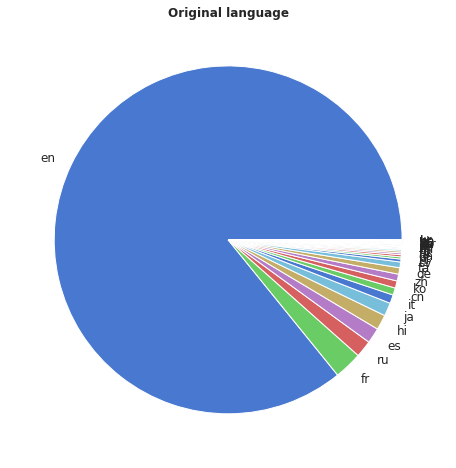

In [26]:
train['original_language'].value_counts().plot.pie()
plt.title('Original language', weight='bold')
plt.ylabel('')

In [27]:
orig_lang_common = list(set(orig_lang_train.columns) & set(orig_lang_test.columns))
orig_lang_train = orig_lang_train[orig_lang_common]
orig_lang_test = orig_lang_test[orig_lang_common]

train = pd.concat([train, orig_lang_train], axis=1)
test = pd.concat([test, orig_lang_test], axis=1)

Text(0, 0.5, 'Origingal language')

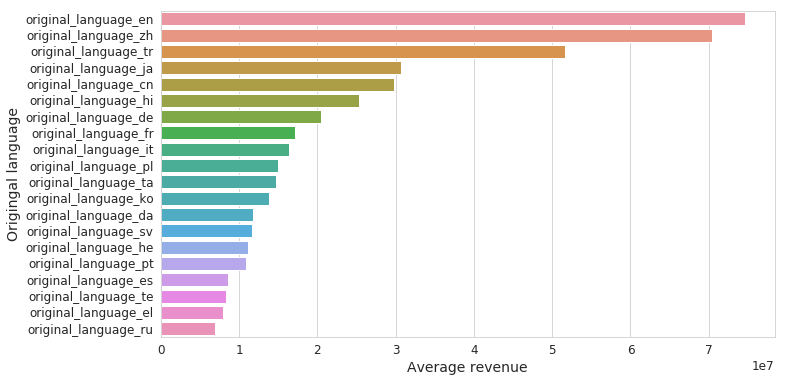

In [28]:
orig_lang_train_df = get_revenue_stats(train, orig_lang_train)[:20]

plt.figure(figsize=(11,6))
g = sns.barplot(x='revenue', y=orig_lang_train_df.index, data=orig_lang_train_df)
plt.xlabel('Average revenue')
plt.ylabel('Origingal language')

<br>
"original_language" could affect the revenue to some degree (English appears to generate the most revenue in general).
<br>
<br>

In [29]:
def top_col(df, top=len(df), skip=0):
    top = min(top, len(df)-skip)
    return list(df.sum().sort_values(ascending=False).index[skip:skip+top])

In [30]:
orig_lang_keep = top_col(pd.concat([orig_lang_train, orig_lang_test], axis=0),5)
orig_lang_train_drop = list(set(orig_lang_train.columns) - set(orig_lang_keep))
orig_lang_test_drop = list(set(orig_lang_test.columns) - set(orig_lang_keep))  

train.drop(orig_lang_train_drop, axis=1, inplace=True)
test.drop(orig_lang_test_drop, axis=1, inplace=True)

In [31]:
train.drop('original_title', axis=1, inplace=True)
test.drop('original_title', axis=1, inplace=True)

In [32]:
for col in ['title','tagline','overview']:
    train['wordcount_'+col] = train[col].fillna('').apply(lambda x: len(x.split()))
    train.drop(col,axis=1,inplace=True)
    test['wordcount_'+col] = test[col].fillna('').apply(lambda x: len(x.split()))
    test.drop(col,axis=1,inplace=True)

In [33]:
train.head(1)

,id,budget,genres,homepage,imdb_id,original_language,popularity,poster_path,production_companies,production_countries,...,runtime_imdb,is_collection,original_language_en,original_language_ru,original_language_hi,original_language_es,original_language_fr,wordcount_title,wordcount_tagline,wordcount_overview
0,1,14000000,[Comedy],NaN,tt2637294,en,6.575393,/tQtWuwvMf0hCc2QR2tkolwl7c3c.jpg,"[Paramount Pictures, United Artists, Metro-Gol...","[{'iso_3166_1': 'US', 'name': 'United States o...",...,93.0,1,1,0,0,0,0,5,11,29


In [34]:
train['production_countries'].apply(lambda x: extract_text(x, 'name')).fillna('').apply(lambda x: len(x)).value_counts()

1    2222
2     525
3     116
4      57
0      55
5      21
6       3
8       1
Name: production_countries, dtype: int64

In [35]:
train['production_countries'] = train['production_countries'].apply(lambda x: extract_text(x, 'name'))
test['production_countries'] = test['production_countries'].apply(lambda x: extract_text(x, 'name'))

In [36]:
for df in [train, test]:
    df['production_countries'] = df['production_countries'].apply(lambda x: x if x else ['NotAvailable'])

In [37]:
prod_ctry_train = get_dummy_dict_col(train, 'production_countries')
prod_ctry_test = get_dummy_dict_col(test, 'production_countries')

In [38]:
prod_ctry_common = list(set(prod_ctry_train.columns) & set(prod_ctry_test.columns))
prod_ctry_train = prod_ctry_train[prod_ctry_common]
prod_ctry_test = prod_ctry_test[prod_ctry_common]

train = pd.concat([train, prod_ctry_train], axis=1)
test = pd.concat([test, prod_ctry_test], axis=1)

Text(0, 0.5, 'production countries')

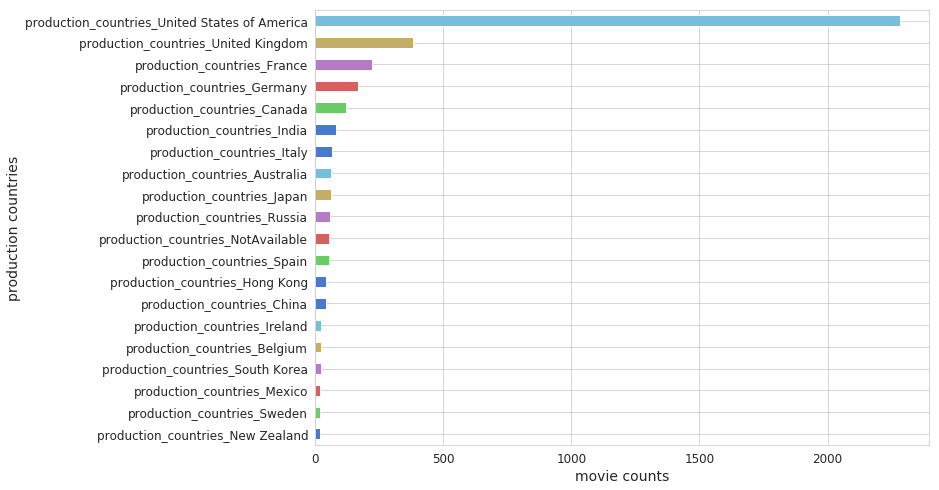

In [39]:
prod_ctry_train.sum().sort_values()[-20:].plot.barh()
plt.xlabel('movie counts')
plt.ylabel('production countries')

Text(0, 0.5, 'Production country')

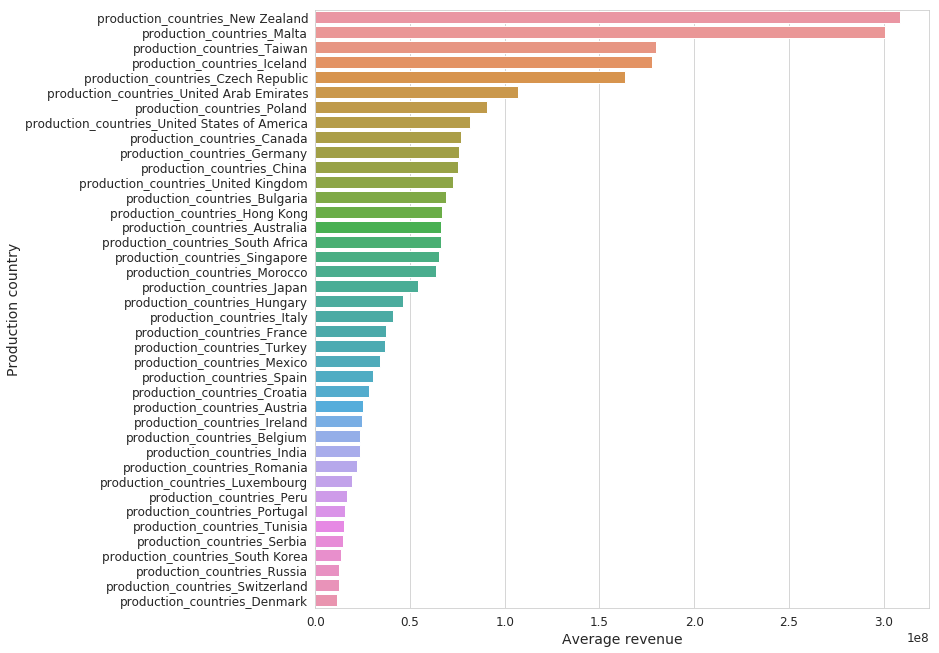

In [40]:
prod_ctry_train_df = get_revenue_stats(train, prod_ctry_train)[:40]

plt.figure(figsize=(11,11))
g = sns.barplot(x='revenue', y=prod_ctry_train_df.index, data=prod_ctry_train_df)
plt.xlabel('Average revenue')
plt.ylabel('Production country')

In [41]:
prod_ctry_keep = top_col(pd.concat([prod_ctry_train, prod_ctry_test], axis=0),0)
prod_ctry_train_drop = list(set(prod_ctry_train.columns) - set(prod_ctry_keep))
prod_ctry_test_drop = list(set(prod_ctry_test.columns) - set(prod_ctry_keep))  

train.drop(prod_ctry_train_drop, axis=1, inplace=True)
test.drop(prod_ctry_test_drop, axis=1, inplace=True)

<br>
About 2/3 of the movies only have 1 production countries, and the major player is USA.
<br>
<br>

In [42]:
for df in [train, test]:
    df['num_prod_ctry'] = df['production_countries'].fillna('').apply(lambda x: len(x))
    df.drop('production_countries', axis=1, inplace=True)

In [43]:
train.head(1)

,id,budget,genres,homepage,imdb_id,original_language,popularity,poster_path,production_companies,release_date,...,is_collection,original_language_en,original_language_ru,original_language_hi,original_language_es,original_language_fr,wordcount_title,wordcount_tagline,wordcount_overview,num_prod_ctry
0,1,14000000,[Comedy],NaN,tt2637294,en,6.575393,/tQtWuwvMf0hCc2QR2tkolwl7c3c.jpg,"[Paramount Pictures, United Artists, Metro-Gol...",2/20/15,...,1,1,0,0,0,0,5,11,29,1


In [44]:
for df in [train, test]:
    df['genres'] = df['genres'].apply(lambda x: x if x else ['NotAvailable'])
    df['genres'] = df['genres'].apply(lambda x: [elem.lower() for elem in x])

In [45]:
genre_train = get_dummy_dict_col(train, 'genres')
genre_test = get_dummy_dict_col(test, 'genres')

Text(0, 0.5, 'genres')

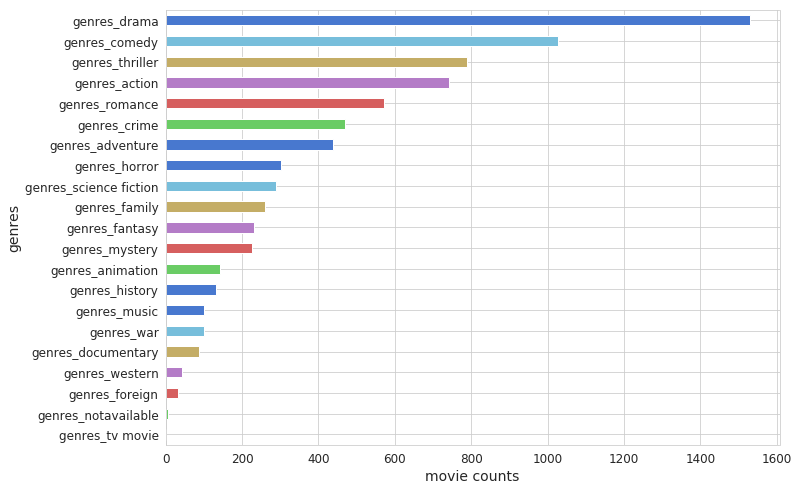

In [46]:
genre_train.sum().sort_values().plot.barh()
plt.xlabel('movie counts')
plt.ylabel('genres')

<br>
The top 5 popular genres are 1) Drama, 2) Comedy, 3) Thriller, 4) Action, and 5) Romance.
<br>
<br>

In [47]:
genre_common = list(set(genre_train.columns) & set(genre_test.columns))
genre_train = genre_train[genre_common]
genre_test = genre_test[genre_common]

train = pd.concat([train, genre_train], axis=1)
test = pd.concat([test, genre_test], axis=1)

Text(0, 0.5, 'Genre')

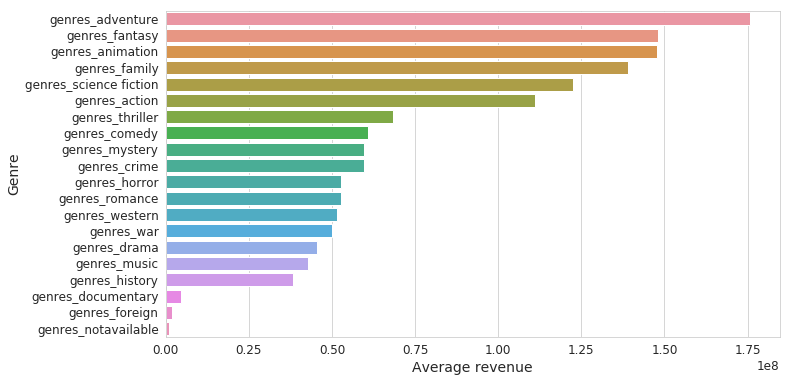

In [48]:
genre_train_df = get_revenue_stats(train, genre_train)

plt.figure(figsize=(11,6))
g = sns.barplot(x='revenue', y=genre_train_df.index, data=genre_train_df)
plt.xlabel('Average revenue')
plt.ylabel('Genre')

<br>
The top 5 genres generate greater average revenues are 1) Adventure, 2) Fantasy, 3) Animation, 4) Family, and 5) Science Fiction. <br>
And the least revenue-generating genres include Documentary and Foreign films.
<br>
<br>

In [49]:
genre_keep = top_col(pd.concat([genre_train, genre_test], axis=0),10)
genre_train_drop = list(set(genre_train.columns) - set(genre_keep))
genre_test_drop = list(set(genre_test.columns) - set(genre_keep))  

train.drop(genre_train_drop, axis=1, inplace=True)
test.drop(genre_test_drop, axis=1, inplace=True)

In [50]:
train.head(2)

,id,budget,genres,homepage,imdb_id,original_language,popularity,poster_path,production_companies,release_date,...,genres_science fiction,genres_adventure,genres_comedy,genres_crime,genres_action,genres_thriller,genres_drama,genres_family,genres_horror,genres_romance
0,1,14000000,[comedy],NaN,tt2637294,en,6.575393,/tQtWuwvMf0hCc2QR2tkolwl7c3c.jpg,"[Paramount Pictures, United Artists, Metro-Gol...",2/20/15,...,0,0,1,0,0,0,0,0,0,0
1,2,40000000,"[comedy, drama, family, romance]",NaN,tt0368933,en,8.248895,/w9Z7A0GHEhIp7etpj0vyKOeU1Wx.jpg,[Walt Disney Pictures],8/6/04,...,0,0,1,0,0,0,1,1,0,1


In [51]:
train['release_date'] = train['release_date'].apply(lambda x: x[:-2]+'20'+x[-2:] if int(x[-2:])<18 else x[:-2]+'19'+x[-2:])
train['release_date'] = pd.to_datetime(train['release_date'])
train['release_year'] = train['release_date'].dt.year
train['release_month'] = train['release_date'].dt.month
train['release_dow'] = train['release_date'].dt.dayofweek
train.drop('release_date', axis=1, inplace=True)

In [52]:
test.loc[test['release_date'].isna(),'imdb_id']

828    tt0210130
Name: imdb_id, dtype: object

In [53]:
test.loc[test['release_date'].isna(), 'release_date'] = '1/5/00'  ## based on IMDB data
test['release_date'] = test['release_date'].apply(lambda x: x[:-2]+'20'+x[-2:] if int(x[-2:])<18 else x[:-2]+'19'+x[-2:])
test['release_date'] = pd.to_datetime(test['release_date'])
test['release_year'] = test['release_date'].dt.year
test['release_month'] = test['release_date'].dt.month
test['release_dow'] = test['release_date'].dt.dayofweek
test.drop('release_date', axis=1, inplace=True)

In [54]:
train['release_year'].describe()

count    3000.000000
mean     1999.713000
std        15.423313
min      1921.000000
25%      1993.000000
50%      2004.000000
75%      2011.000000
max      2017.000000
Name: release_year, dtype: float64

In [55]:
test['release_year'].describe()

count    4398.000000
mean     1999.652569
std        15.333731
min      1918.000000
25%      1992.000000
50%      2004.000000
75%      2011.000000
max      2017.000000
Name: release_year, dtype: float64

In [56]:
train.head(1)

,id,budget,genres,homepage,imdb_id,original_language,popularity,poster_path,production_companies,runtime,...,genres_crime,genres_action,genres_thriller,genres_drama,genres_family,genres_horror,genres_romance,release_year,release_month,release_dow
0,1,14000000,[comedy],NaN,tt2637294,en,6.575393,/tQtWuwvMf0hCc2QR2tkolwl7c3c.jpg,"[Paramount Pictures, United Artists, Metro-Gol...",93.0,...,0,0,0,0,0,0,0,2015,2,4


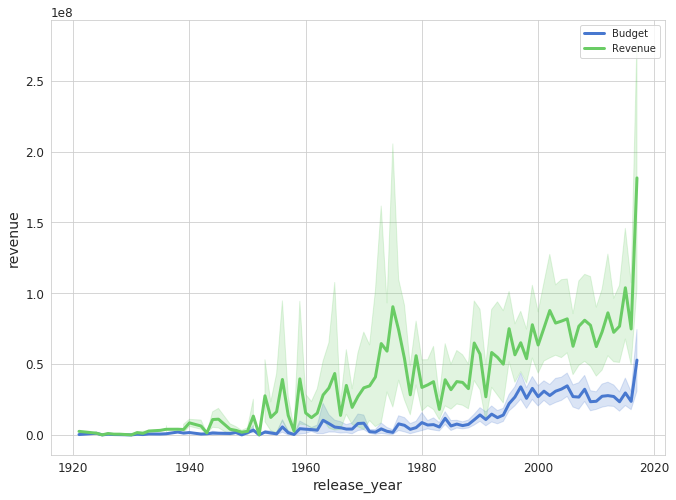

In [57]:
g = sns.lineplot(x='release_year', y='budget', data=train, lw=3, label='Budget')
g = sns.lineplot(x='release_year', y='revenue', data=train, lw=3, label='Revenue')
plt.legend()

<br>
The general trend for the movie budget is **increasing** with released year, and so as the revenue.
<br>
<br>

Text(0, 0.5, 'Movie count')

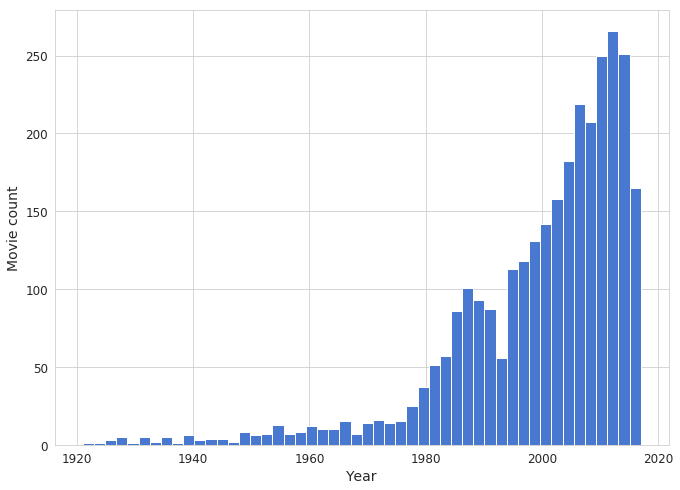

In [58]:
fig = plt.hist(train['release_year'], bins=50)
plt.xlabel('Year')
plt.ylabel('Movie count')

Text(0, 0.5, 'Revenue')

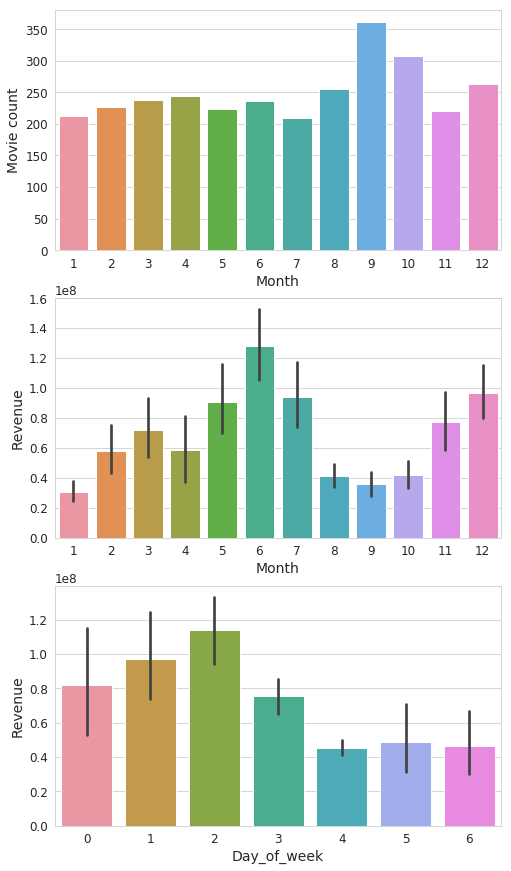

In [59]:
release_month = train['release_month'].value_counts()

figs, axes = plt.subplots(3,1, figsize=(8,15))
g = sns.barplot(release_month.index, release_month, ax=axes[0])
axes[0].set_xlabel('Month')
axes[0].set_ylabel('Movie count')

g = sns.barplot(x='release_month', y='revenue', data=train, ax=axes[1])
axes[1].set_xlabel('Month')
axes[1].set_ylabel('Revenue')

g = sns.barplot(x='release_dow', y='revenue', data=train, ax=axes[2])
axes[2].set_xlabel('Day_of_week')
axes[2].set_ylabel('Revenue')

In [60]:
train['cast'][0]

"[{'cast_id': 4, 'character': 'Lou', 'credit_id': '52fe4ee7c3a36847f82afae7', 'gender': 2, 'id': 52997, 'name': 'Rob Corddry', 'order': 0, 'profile_path': '/k2zJL0V1nEZuFT08xUdOd3ucfXz.jpg'}, {'cast_id': 5, 'character': 'Nick', 'credit_id': '52fe4ee7c3a36847f82afaeb', 'gender': 2, 'id': 64342, 'name': 'Craig Robinson', 'order': 1, 'profile_path': '/tVaRMkJXOEVhYxtnnFuhqW0Rjzz.jpg'}, {'cast_id': 6, 'character': 'Jacob', 'credit_id': '52fe4ee7c3a36847f82afaef', 'gender': 2, 'id': 54729, 'name': 'Clark Duke', 'order': 2, 'profile_path': '/oNzK0umwm5Wn0wyEbOy6TVJCSBn.jpg'}, {'cast_id': 7, 'character': 'Adam Jr.', 'credit_id': '52fe4ee7c3a36847f82afaf3', 'gender': 2, 'id': 36801, 'name': 'Adam Scott', 'order': 3, 'profile_path': '/5gb65xz8bzd42yjMAl4zwo4cvKw.jpg'}, {'cast_id': 8, 'character': 'Hot Tub Repairman', 'credit_id': '52fe4ee7c3a36847f82afaf7', 'gender': 2, 'id': 54812, 'name': 'Chevy Chase', 'order': 4, 'profile_path': '/svjpyYtPwtjvRxX9IZnOmOkhDOt.jpg'}, {'cast_id': 9, 'character

<br>
In the "cast" feature, the members are already sorted in some kind of order, presumably by the popularity/billed.
<br>
<br>

In [61]:
for df in [train, test]:
    df['cast_gender'] = df['cast'].apply(lambda x: extract_text(x, 'gender'))
    df['gender_0_cast'] = df['cast_gender'].fillna('').apply(lambda x: x.count('0'))
    df['gender_1_cast'] = df['cast_gender'].fillna('').apply(lambda x: x.count('1'))
    df['gender_2_cast'] = df['cast_gender'].fillna('').apply(lambda x: x.count('2'))
    df['cast_name'] = df['cast'].apply(lambda x: extract_text(x, 'name'))
    df['cast_name'] = df['cast_name'].fillna('').apply(lambda x: [elem.lower() for elem in x][:10])
    df['len_cast'] = df['cast_name'].fillna('').apply(lambda x: len(x))
    df.drop(['cast','cast_gender'], axis=1, inplace=True)

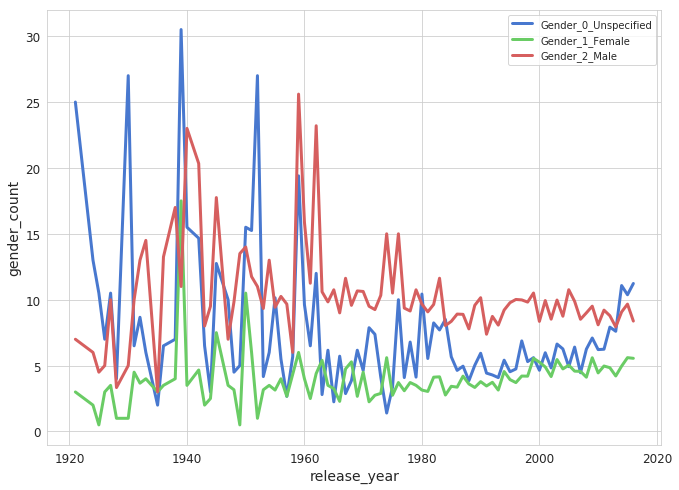

In [62]:
gender_df = train.groupby('release_year', axis=0).agg({'gender_0_cast':'mean',
                                                       'gender_1_cast':'mean',
                                                       'gender_2_cast':'mean',
                                                       'revenue':'mean',
                                                       'budget':'mean'})

g = sns.lineplot(x=gender_df.index[:-1], y='gender_0_cast', data=gender_df[:-1], lw=3, label='Gender_0_Unspecified')
g = sns.lineplot(x=gender_df.index[:-1], y='gender_1_cast', data=gender_df[:-1], lw=3, label='Gender_1_Female')
g = sns.lineplot(x=gender_df.index[:-1], y='gender_2_cast', data=gender_df[:-1], lw=3, label='Gender_2_Male')
plt.ylabel('gender_count')
# plt.yscale('log')
plt.legend()

<br>
Number of male casts are almost always higher than the number of female casts, assuming unspecified data are evenly distributed in both genders.
<br>
<br>

In [63]:
cast_train = get_dummy_dict_col(train, 'cast_name')
cast_test = get_dummy_dict_col(test, 'cast_name')

Text(0, 0.5, 'Cast')

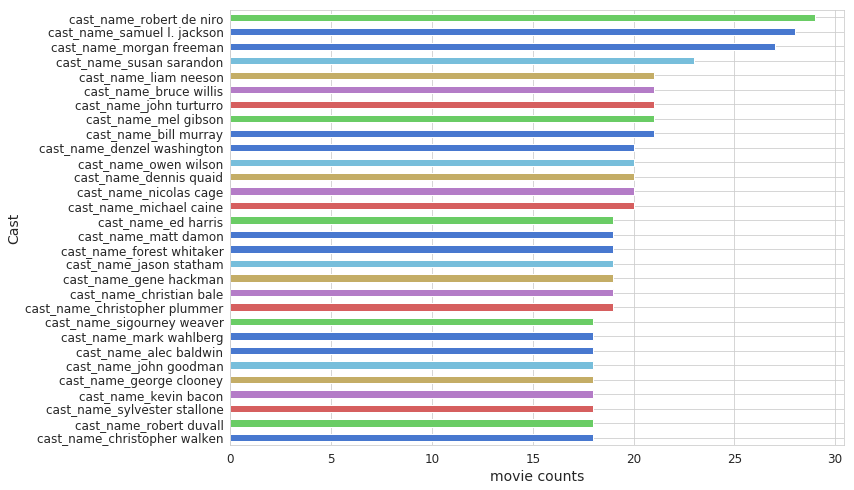

In [64]:
cast_train.sum().sort_values()[-30:].plot.barh()
plt.xlabel('movie counts')
plt.ylabel('Cast')

In [65]:
cast_common = list(set(cast_train.columns) & set(cast_test.columns))
cast_train = cast_train[cast_common]
cast_test = cast_test[cast_common]

train = pd.concat([train, cast_train], axis=1)
test = pd.concat([test, cast_test], axis=1)

Text(0, 0.5, 'Cast (Top 20)')

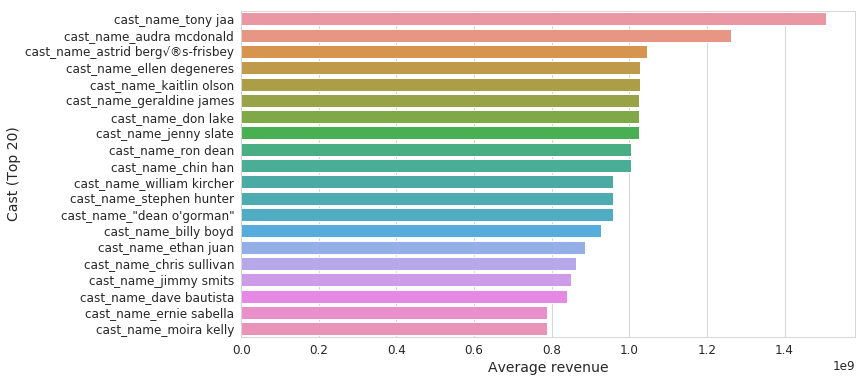

In [66]:
cast_train_df = get_revenue_stats(train, cast_train)[:20]

plt.figure(figsize=(11,6))
g = sns.barplot(x='revenue', y=cast_train_df.index, data=cast_train_df)
plt.xlabel('Average revenue')
plt.ylabel('Cast (Top 20)')

In [67]:
cast_keep = top_col(pd.concat([cast_train, cast_test], axis=0),0)
cast_train_drop = list(set(cast_train.columns) - set(cast_keep))
cast_test_drop = list(set(cast_test.columns) - set(cast_keep))  

train.drop(cast_train_drop, axis=1, inplace=True)
test.drop(cast_test_drop, axis=1, inplace=True)

In [68]:
for df in [train, test]:
    df['crew_gender'] = df['crew'].apply(lambda x: extract_text(x, 'gender'))
    df['gender_0_crew'] = df['crew_gender'].fillna('').apply(lambda x: x.count('0'))
    df['gender_1_crew'] = df['crew_gender'].fillna('').apply(lambda x: x.count('1'))
    df['gender_2_crew'] = df['crew_gender'].fillna('').apply(lambda x: x.count('2'))
    df['crew_roles'] = df['crew'].apply(lambda x: extract_text(x, 'job'))
    df['len_crew'] = df['crew_roles'].fillna('').apply(lambda x: len(x))
    df['crew_director'] = df['crew'].fillna('').apply(lambda x: dict(list(zip(extract_text(x, 'job'), extract_text(x, 'name')))).get('Director'))
    df['crew_producer'] = df['crew'].fillna('').apply(lambda x: dict(list(zip(extract_text(x, 'job'), extract_text(x, 'name')))).get('Producer'))
    df['crew_writer'] = df['crew'].fillna('').apply(lambda x: dict(list(zip(extract_text(x, 'job'), extract_text(x, 'name')))).get('Writer'))
    df.loc[df['crew_director'].isna(), 'crew_director'] = 'NotAvailable'
    df.loc[df['crew_producer'].isna(), 'crew_producer'] = 'NotAvailable'
    df.loc[df['crew_writer'].isna(), 'crew_writer'] = 'NotAvailable'
    df.drop(['crew','crew_gender','crew_roles'],axis=1, inplace=True)


In [69]:
for df in [train, test]:
    df['crew_director'] = df['crew_director'].apply(lambda x: remove_punc(x.lower()))
    df['crew_producer'] = df['crew_producer'].apply(lambda x: remove_punc(x.lower()))
    df['crew_writer'] = df['crew_writer'].apply(lambda x: remove_punc(x.lower()))
    df['crew_combined'] = [[x,y,z] for x,y,z in zip(df['crew_director'],df['crew_producer'],df['crew_writer'])]

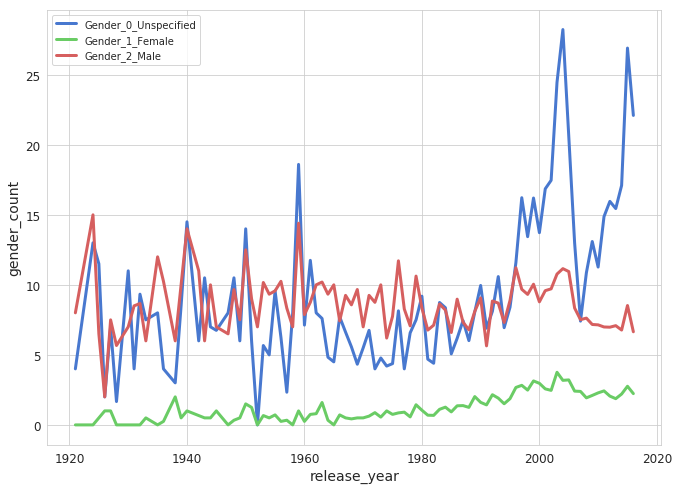

In [70]:
gender_crew_df = train.groupby('release_year', axis=0).agg({'gender_0_crew':'mean',
                                                            'gender_1_crew':'mean',
                                                            'gender_2_crew':'mean',
                                                            'revenue':'mean',
                                                            'budget':'mean'})

g = sns.lineplot(x=gender_crew_df.index[:-1], y='gender_0_crew', data=gender_crew_df[:-1], lw=3, label='Gender_0_Unspecified')
g = sns.lineplot(x=gender_crew_df.index[:-1], y='gender_1_crew', data=gender_crew_df[:-1], lw=3, label='Gender_1_Female')
g = sns.lineplot(x=gender_crew_df.index[:-1], y='gender_2_crew', data=gender_crew_df[:-1], lw=3, label='Gender_2_Male')
plt.ylabel('gender_count')
plt.legend()

In [71]:
crew_train = get_dummy_dict_col(train, 'crew_combined')
crew_test = get_dummy_dict_col(test, 'crew_combined')

(1, 30)

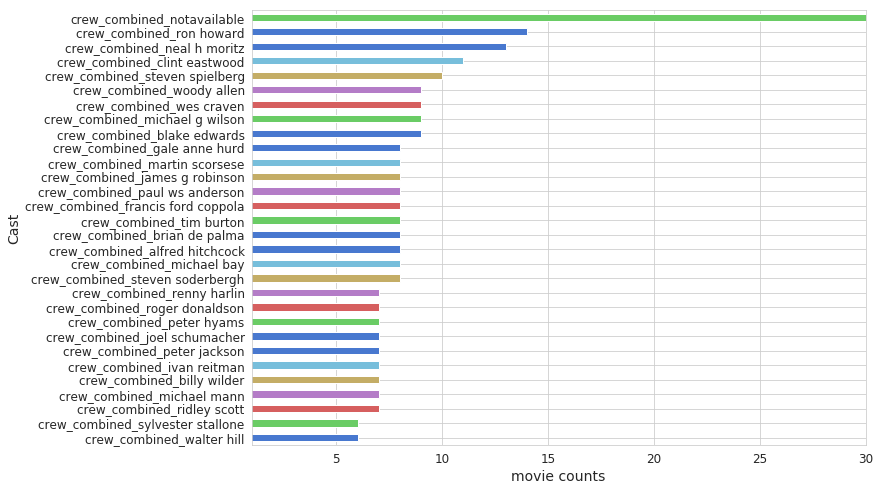

In [72]:
crew_train.sum().sort_values()[-30:].plot.barh()
plt.xlabel('movie counts')
plt.ylabel('Cast')
plt.xlim([1,30])

In [73]:
crew_common = list(set(crew_train.columns) & set(crew_test.columns))
crew_train = crew_train[crew_common]
crew_test = crew_test[crew_common]

train = pd.concat([train, crew_train], axis=1)
test = pd.concat([test, crew_test], axis=1)

Text(0, 0.5, 'Major crew (Director/Producer/Writer)')

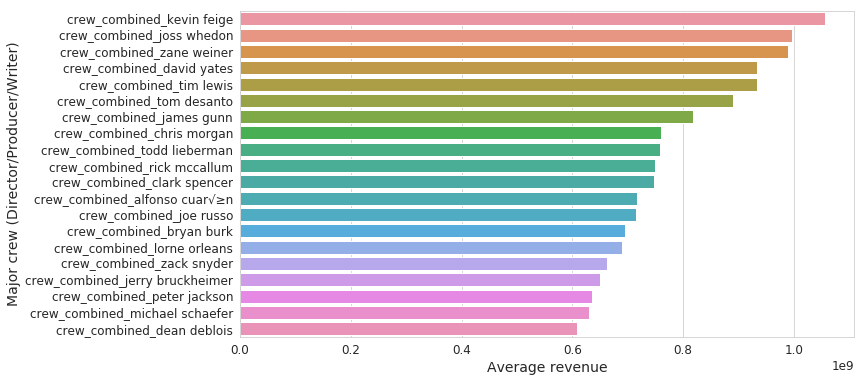

In [74]:
crew_train_df = get_revenue_stats(train, crew_train)[:20]

plt.figure(figsize=(11,6))
g = sns.barplot(x='revenue', y=crew_train_df.index, data=crew_train_df)
plt.xlabel('Average revenue')
plt.ylabel('Major crew (Director/Producer/Writer)')

In [75]:
pd.concat([crew_train, crew_test], axis=0).sum().sort_values(ascending=False)[:20]

crew_combined_notavailable         5604
crew_combined_steven spielberg       30
crew_combined_clint eastwood         29
crew_combined_woody allen            27
crew_combined_ridley scott           24
crew_combined_ron howard             23
crew_combined_alfred hitchcock       21
crew_combined_neal h moritz          20
crew_combined_robert zemeckis        19
crew_combined_tim burton             19
crew_combined_martin scorsese        18
crew_combined_oliver stone           18
crew_combined_brian de palma         18
crew_combined_renny harlin           18
crew_combined_blake edwards          17
crew_combined_joel schumacher        17
crew_combined_steven soderbergh      17
crew_combined_john carpenter         16
crew_combined_jerry bruckheimer      16
crew_combined_wes craven             16
dtype: int64

In [76]:
crew_keep = top_col(pd.concat([crew_train, crew_test], axis=0), 0)
crew_train_drop = list(set(crew_train.columns) - set(crew_keep))
crew_test_drop = list(set(crew_test.columns) - set(crew_keep))  

train.drop(crew_train_drop, axis=1, inplace=True)
test.drop(crew_test_drop, axis=1, inplace=True)

In [77]:
print('Total count of distinct Director:', len(set(df['crew_director'])))
print('Count of people who has been Director & Producer:', len(set(df['crew_director']) & set(df['crew_producer'])))
print('Count of people who has been Director & Writer:',len(set(df['crew_director']) & set(df['crew_writer'])))

Total count of distinct Director: 2469
Count of people who has been Director & Producer: 265
Count of people who has been Director & Writer: 529


<br>
Because missing values in "Writer" is almost 2/3 of the trianing data, this info may not be very useful.
<br>
<br>

In [78]:
train.head(1)

,id,budget,genres,homepage,imdb_id,original_language,popularity,poster_path,production_companies,runtime,...,cast_name,len_cast,gender_0_crew,gender_1_crew,gender_2_crew,len_crew,crew_director,crew_producer,crew_writer,crew_combined
0,1,14000000,[comedy],NaN,tt2637294,en,6.575393,/tQtWuwvMf0hCc2QR2tkolwl7c3c.jpg,"[Paramount Pictures, United Artists, Metro-Gol...",93.0,...,"[rob corddry, craig robinson, clark duke, adam...",10,59,0,13,72,steve pink,andrew panay,josh heald,"[steve pink, andrew panay, josh heald]"


In [79]:
for df in [train, test]:
    df['production_companies'] = df['production_companies'].fillna('').apply(lambda x: [name.lower() for name in x])

In [80]:
prod_com_train = get_dummy_dict_col(train, 'production_companies')
prod_com_test = get_dummy_dict_col(test, 'production_companies')

Text(0, 0.5, 'Production company')

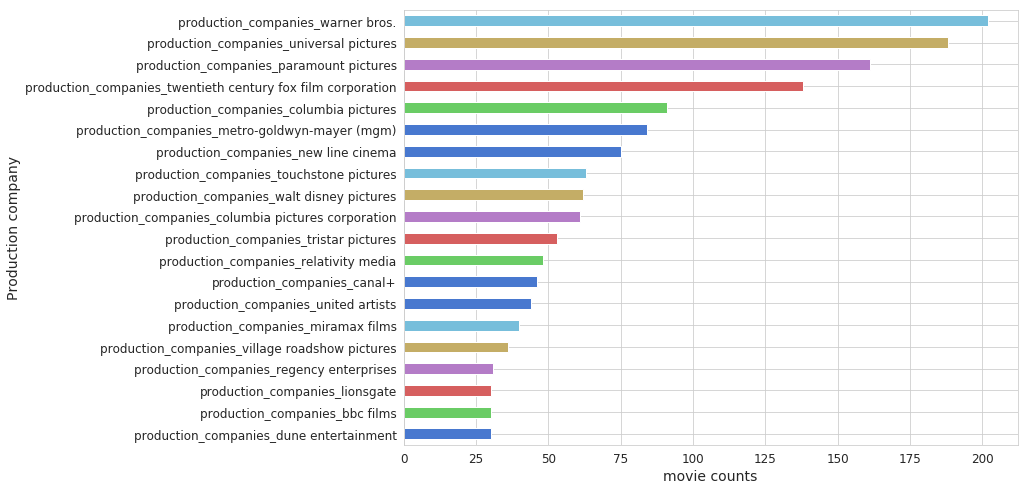

In [81]:
prod_com_train.sum().sort_values()[-20:].plot.barh()
plt.xlabel('movie counts')
plt.ylabel('Production company')

In [82]:
prod_com_common = list(set(prod_com_train.columns) & set(prod_com_test.columns))
prod_com_train = prod_com_train[prod_com_common]
prod_com_test = prod_com_test[prod_com_common]

train = pd.concat([train, prod_com_train], axis=1)
test = pd.concat([test, prod_com_test], axis=1)

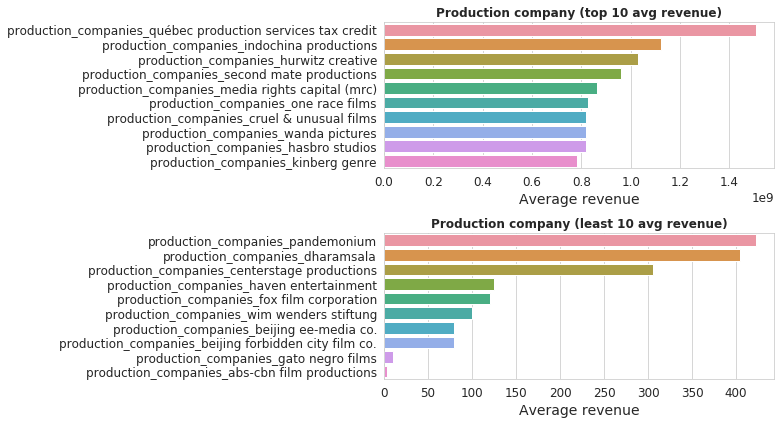

In [83]:
prod_com_train_df = get_revenue_stats(train, prod_com_train)

fig, axs = plt.subplots(2,1,figsize=(11,6))
g = sns.barplot(x='revenue', y=prod_com_train_df[:10].index, data=prod_com_train_df[:10] ,ax=axs[0])
axs[0].set_xlabel('Average revenue')
axs[0].set_title('Production company (top 10 avg revenue)', weight='bold')

g = sns.barplot(x='revenue', y=prod_com_train_df[-10:].index, data=prod_com_train_df[-10:] ,ax=axs[1])
axs[1].set_xlabel('Average revenue')
axs[1].set_title('Production company (least 10 avg revenue)', weight='bold')

plt.tight_layout()

In [84]:
pd.concat([prod_com_train, prod_com_test], axis=0).sum().sort_values(ascending=False)[:20]

production_companies_warner bros.                              491
production_companies_universal pictures                        463
production_companies_paramount pictures                        393
production_companies_twentieth century fox film corporation    341
production_companies_columbia pictures                         236
production_companies_metro-goldwyn-mayer (mgm)                 207
production_companies_new line cinema                           198
production_companies_touchstone pictures                       158
production_companies_walt disney pictures                      147
production_companies_columbia pictures corporation             140
production_companies_canal+                                    130
production_companies_tristar pictures                          121
production_companies_relativity media                          115
production_companies_united artists                            105
production_companies_miramax films                            

In [85]:
prod_com_keep = top_col(pd.concat([prod_com_train, prod_com_test], axis=0),4)
prod_com_train_drop = list(set(prod_com_train.columns) - set(prod_com_keep))
prod_com_test_drop = list(set(prod_com_test.columns) - set(prod_com_keep))  

train.drop(prod_com_train_drop, axis=1, inplace=True)
test.drop(prod_com_test_drop, axis=1, inplace=True)

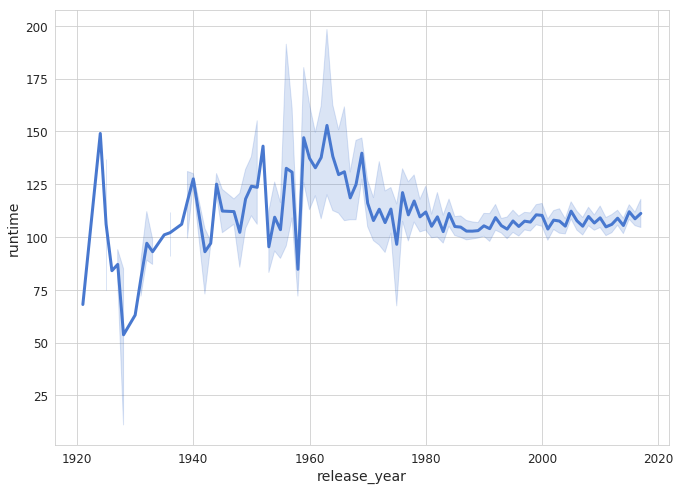

In [86]:
g = sns.lineplot(x='release_year', y='runtime', lw=3, data=train)

<br>
Interestingly, "runtime" seems to increase since 1930 and then peaked around 1960s. After that the length of movies tends to reduce and become more stable around 115-120 min.
<br>
<br>

In [87]:
train.loc[train['runtime'].isna(),['runtime','runtime_imdb']]

,runtime,runtime_imdb
1335,NaN,130.0
2302,NaN,NaN


In [88]:
test.loc[test['runtime'].isna(),['runtime','runtime_imdb']]

,runtime,runtime_imdb
243,NaN,93.0
1489,NaN,91.0
1632,NaN,NaN
3817,NaN,90.0


<br>
There are a few missing values in "runtime" for both train and test datasets.
<br>
<br>

In [89]:
train.loc[train['runtime'].isna(),'runtime'] = train.loc[train['runtime'].isna(),'runtime_imdb']
test.loc[test['runtime'].isna(),'runtime'] = test.loc[test['runtime'].isna(),'runtime_imdb']

<br>
Fill the missiing runtime from the available IMDB data.<br>
For the remaining missing runtime, fill them by the mean runtime of the films producded within 1 years.
<br><br>

In [90]:
runtime_missing_year = train.loc[(train['runtime'].isna()) | (train['runtime']==0),'release_year'].tolist() + \
                       test.loc[(test['runtime'].isna()) | (test['runtime']==0),'release_year'].tolist() 

runtime_dict = {}

for yr in runtime_missing_year:
    temp = train.loc[train['release_year'].isin([yr-1, yr, yr+1]), 'runtime']
    runtime_dict[yr] = temp[temp>0].mean()

for df in [train, test]:
    df.loc[(df['runtime'].isna()) | (df['runtime']==0),'runtime'] = \
            df.loc[(df['runtime'].isna()) | (df['runtime']==0),'release_year'].apply(runtime_dict.get)

In [91]:
train.head(1)

,id,budget,genres,homepage,imdb_id,original_language,popularity,poster_path,production_companies,runtime,...,gender_2_crew,len_crew,crew_director,crew_producer,crew_writer,crew_combined,production_companies_universal pictures,production_companies_warner bros.,production_companies_twentieth century fox film corporation,production_companies_paramount pictures
0,1,14000000,[comedy],NaN,tt2637294,en,6.575393,/tQtWuwvMf0hCc2QR2tkolwl7c3c.jpg,"[paramount pictures, united artists, metro-gol...",93.0,...,13,72,steve pink,andrew panay,josh heald,"[steve pink, andrew panay, josh heald]",0,0,0,1


In [92]:
for df in [train, test]:
    df['spoken_languages'] = df['spoken_languages'].apply(lambda x: extract_text(x, 'name'))
    df['num_languages'] = df['spoken_languages'].fillna('').apply(lambda x: len(x))
    df.drop('spoken_languages', axis=1, inplace=True)

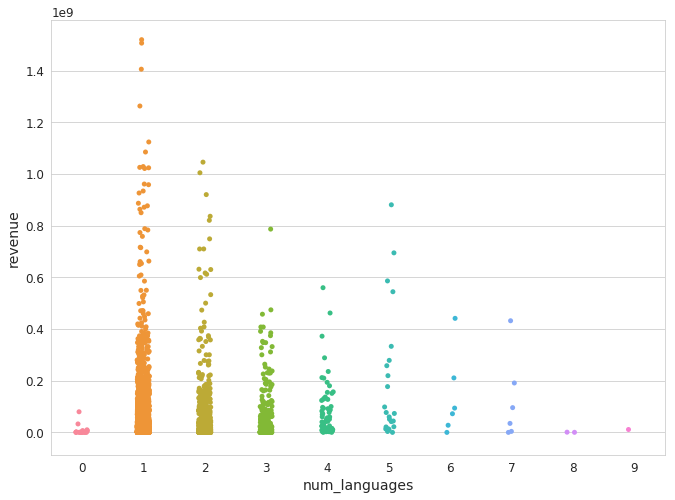

In [93]:
g = sns.stripplot(x='num_languages', y='revenue', data=train)

<br>
Number of "spoken_languages" feature is created, and it seems like 1-3 total spoken languages produce a relatively high revenue rather than more languages.
<br><br>

Text(0, 0.5, 'log_revenue')

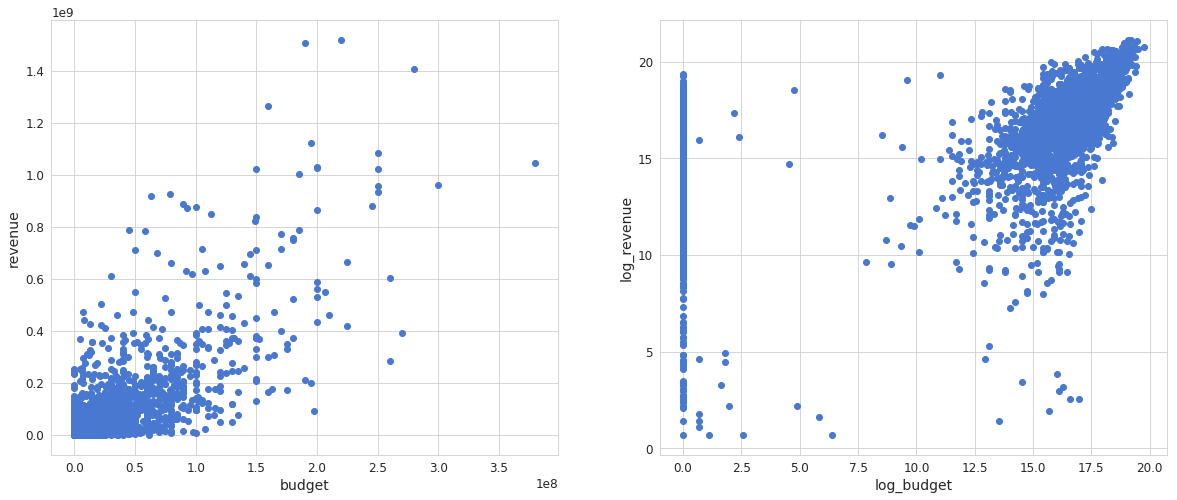

In [94]:
fig, axs = plt.subplots(1,2,figsize=(20,8))
axs[0].scatter(train['budget'], train['revenue'])
axs[1].scatter(np.log1p(train['budget']), np.log1p(train['revenue']))
axs[0].set_xlabel('budget')
axs[0].set_ylabel('revenue')
axs[1].set_xlabel('log_budget')
axs[1].set_ylabel('log_revenue')

In [95]:
for df in [train, test]:
    df.drop(['imdb_id','homepage','poster_path','status','budget_imdb','director_imdb','runtime_imdb'], axis=1, inplace=True)

<br>
"imdb_id" has been used to obtain information of ratings, vote counts, etc. <br>
"poster_path" does not affect the prediction. <br>
"status" seems not relevant.<br><br>

<br>
Here is to clean up some text features by NLP<br><br>

In [96]:
stopword = nltk.corpus.stopwords.words('english')

In [97]:
def remove_stopword(text):
    text_rmstpwd = [word for word in text if word not in stopword]
    return text_rmstpwd

In [98]:
for df in [train, test]:
    df['Keywords'] = df['Keywords'].fillna('').apply(lambda x: remove_stopword(x))

In [99]:
keyword_train = get_dummy_dict_col(train, 'Keywords')
keyword_test = get_dummy_dict_col(test, 'Keywords')

Text(0, 0.5, 'Keyword')

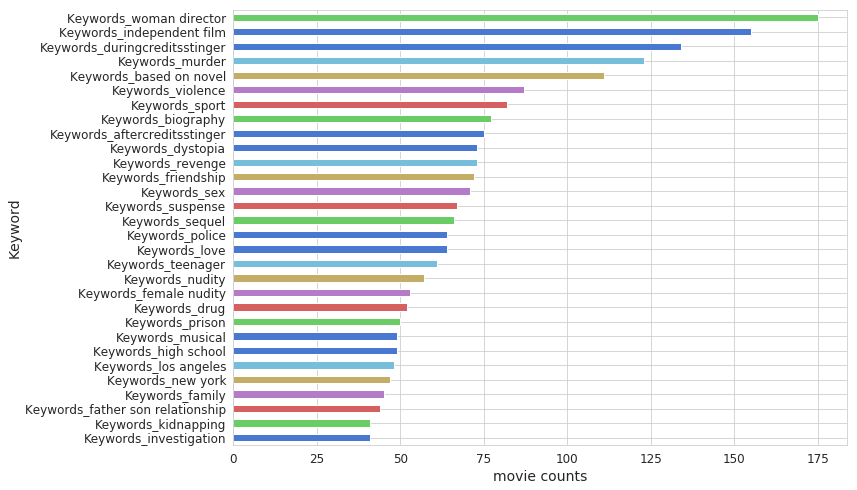

In [100]:
keyword_train.sum().sort_values()[-30:].plot.barh()
plt.xlabel('movie counts')
plt.ylabel('Keyword')

In [101]:
keyword_common = list(set(keyword_train.columns) & set(keyword_test.columns))
keyword_train = keyword_train[keyword_common]
keyword_test = keyword_test[keyword_common]

train = pd.concat([train, keyword_train], axis=1)
test = pd.concat([test, keyword_test], axis=1)

Text(0, 0.5, 'Keyword')

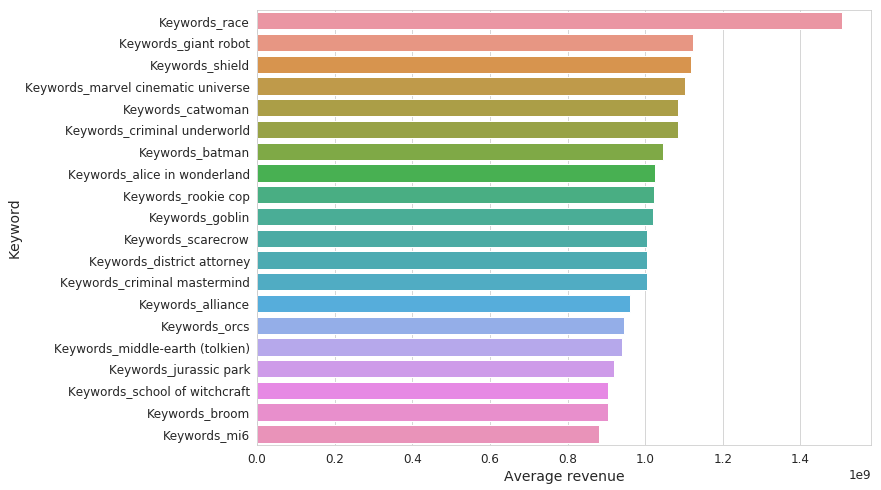

In [102]:
keyword_train_df = get_revenue_stats(train, keyword_train)[:20]

g = sns.barplot(x='revenue', y=keyword_train_df.index, data=keyword_train_df)
plt.xlabel('Average revenue')
plt.ylabel('Keyword')

In [103]:
pd.concat([keyword_train, keyword_test], axis=0).sum().sort_values(ascending=False)[:20]

Keywords_woman director          457
Keywords_independent film        384
Keywords_duringcreditsstinger    350
Keywords_based on novel          312
Keywords_murder                  305
Keywords_violence                245
Keywords_love                    190
Keywords_revenge                 188
Keywords_sex                     186
Keywords_aftercreditsstinger     183
Keywords_biography               176
Keywords_sport                   175
Keywords_friendship              168
Keywords_dystopia                166
Keywords_police                  160
Keywords_suspense                159
Keywords_sequel                  158
Keywords_nudity                  153
Keywords_musical                 147
Keywords_teenager                145
dtype: int64

In [104]:
keyword_keep = top_col(pd.concat([keyword_train, keyword_test], axis=0),5)
keyword_train_drop = list(set(keyword_train.columns) - set(keyword_keep))
keyword_test_drop = list(set(keyword_test.columns) - set(keyword_keep))  

train.drop(keyword_train_drop, axis=1, inplace=True)
test.drop(keyword_test_drop, axis=1, inplace=True)

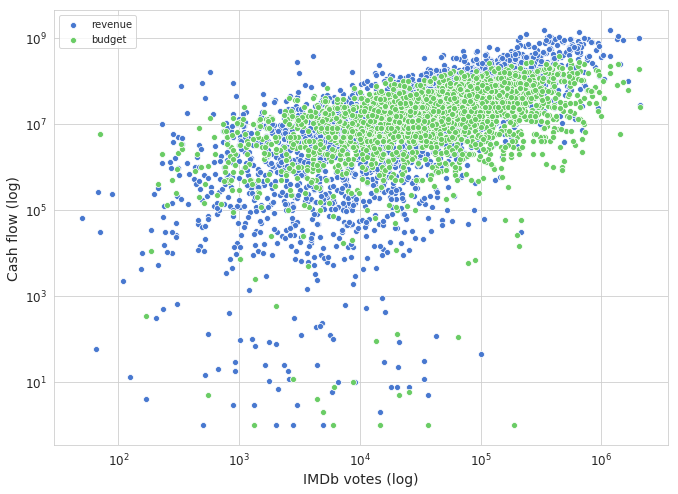

In [105]:
g = sns.scatterplot(x='votes_imdb', y='revenue', data=train, label='revenue')
g = sns.scatterplot(x='votes_imdb', y='budget', data=train, label='budget')
plt.xlabel('IMDb votes (log)')
plt.ylabel('Cash flow (log)')
plt.xscale('log')
plt.yscale('log')

<br>
Because the film industry is changing fast in a yearly basis, it may be insightful to get some features normalized by year. <br>
(Note: the calculated yearly ratio features were not included because they were not helpful in improving the model's accuray. This is likely due to the limited number of movies released before 1970s, which leads to an imbalanced estimate in yearly average estimation)<br><br>

In [106]:
# def get_yearly_ratio(df, col):
#     year_avg = train.groupby('release_year', axis=0).agg({col:'mean'})
#     df['yearly_ratio_'+col] = df.apply(lambda row: row[col]/year_avg.loc[row['release_year']] \
#                                        if ((row['release_year'] in year_avg.index) and year_avg.loc[row['release_year']].item()>0) else 1, axis=1)


# year_mean_col = ['budget']#, 'popularity', 'runtime', 'len_cast']

# # create the yearly_meal_col
# for c in year_mean_col:
#     get_yearly_ratio(train, c)
#     get_yearly_ratio(test, c)


<br>
Feature engineering to create log-scaled "revenue" and "budget", and also the ratio of budget to runtime.<br><br>

In [107]:
train['log_revenue'] = np.log1p(train['revenue'])

for df in [train, test]:
    df['log_budget'] = np.log1p(df['budget'])
    df['budget_to_runtime'] = df['budget']/df['runtime']

## Linear regressor, Random Forest and LightGBM

In [108]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_squared_log_error
from sklearn.linear_model import ElasticNetCV
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
import lightgbm as lgb
from lightgbm import LGBMRegressor
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/lightgbm/__init__.py:46: UserWarning: Starting from version 2.2.1, the library file in distribution wheels for macOS is built by the Apple Clang (Xcode_8.3.3) compiler.
This means that in case of installing LightGBM from PyPI via the ``pip install lightgbm`` command, you don't need to install the gcc compiler anymore.
Instead of that, you need to install the OpenMP library, which is required for running LightGBM on the system with the Apple Clang compiler.
You can install the OpenMP library by the following command: ``brew install libomp``.
  "You can install the OpenMP library by the following command: ``brew install libomp``.", UserWarning)


In [109]:
#Validation function
def rmse_cv(model, X, y, n_folds=5):
    kf = KFold(n_folds, shuffle=True, random_state=100).get_n_splits(X.values)
    rmse = np.sqrt(-cross_val_score(model, X.values, y.values,
                                   scoring="neg_mean_squared_error",
                                   cv=kf,
                                   verbose=0, 
                                   n_jobs=-1))
    return rmse

In [110]:
np.random.seed(100)
mask = np.random.rand(len(train))<1
train_df = train[mask]
eval_df = train[~mask]
test_df = test.copy()

In [111]:
train_df.head(1)

,id,budget,genres,original_language,popularity,production_companies,runtime,Keywords,revenue,rating_imdb,...,production_companies_paramount pictures,num_languages,Keywords_independent film,Keywords_based on novel,Keywords_murder,Keywords_woman director,Keywords_duringcreditsstinger,log_revenue,log_budget,budget_to_runtime
0,1,14000000,[comedy],en,6.575393,"[paramount pictures, united artists, metro-gol...",93.0,"[time travel, sequel, hot tub, duringcreditsst...",12314651,5.1,...,1,1,0,0,0,0,1,16.3263,16.454568,150537.634409


In [112]:
for df in [train_df, eval_df, test]:
    df[['release_year', 'release_month', 'release_dow']] = \
    df[['release_year', 'release_month', 'release_dow']].applymap(int)

In [113]:
drop_col = ['log_revenue','revenue','id','genres','production_companies','Keywords','original_language',
            'release_dow','release_month', #'release_year',
            'cast_name','crew_combined','crew_director','crew_producer','crew_writer']


In [114]:
X_train = train_df.drop(drop_col, axis=1)
y_train = train_df[['log_revenue']]
X_eval = eval_df.drop(drop_col, axis=1)
y_eval = eval_df[['log_revenue']]


X_test = test_df.drop(drop_col[2:], axis=1)


In [115]:
def report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f}".format(
                  np.sqrt(-results['mean_test_score'][candidate])))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")

<br>
Get baseline values from some basic regressors. It appears GradientBoostingRegressor gives the best CV result.<br><br>

In [116]:
model_enet = ElasticNetCV()

In [117]:
score = rmse_cv(model_enet, X_train, y_train)
print("Models score: {:.4f} ({:.4f})".format(score.mean(), score.std()))

Models score: 2.6409 (0.1415)


In [118]:
model_rfr = RandomForestRegressor(n_jobs=-1)

In [119]:
score = rmse_cv(model_rfr, X_train, y_train)
print("Models score: {:.4f} ({:.4f})".format(score.mean(), score.std()))

Models score: 2.1665 (0.1470)


In [120]:
gbr_params = {'n_estimators': 100, 
              'max_depth': 4, 
              'min_samples_split': 2,
              'min_samples_leaf':2,
              'learning_rate': 0.1,
              'subsample':0.2,
              'loss':'huber',
             }

model_gbr = GradientBoostingRegressor(**gbr_params)

In [121]:
score = rmse_cv(model_gbr, X_train, y_train)
print("Models score: {:.4f} ({:.4f})".format(score.mean(), score.std()))

Models score: 2.0885 (0.1299)


<br>
Now let's try to model the data with more powerful regressors. First the LightGBM with hyperparameter tuning. <br><br>

In [122]:
lgb_params = {'max_depth':[3,4,5,6],
              'num_leaves':np.arange(2,40,2),
              'n_estimators':np.arange(100,400,10),
              'min_split_gain':np.linspace(0.1,1,10),
              'min_child_samples':np.arange(1,10,1),
              'learning_rate':[0.005,0.01,0.02],
              'reg_alpha':[0.005,0.01,0.05,0.1],
              'feature_fraction':np.linspace(0.1,1,10),
              'bagging_freq':np.arange(2,8,1),
              'bagging_fraction':np.linspace(0.1,1,10)
             }

n_iter = 50
lgb_random_search = RandomizedSearchCV(LGBMRegressor(), 
                                       param_distributions=lgb_params,
                                       n_iter=n_iter, 
                                       cv=5, 
                                       scoring='neg_mean_squared_error', 
                                       n_jobs=-1,
                                       iid=False)


In [124]:
lgb_random_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, error_score='raise-deprecating',
          estimator=LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
       importance_type='split', learning_rate=0.1, max_depth=-1,
       min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
       n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
       random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
       subsample=1.0, subsample_for_bin=200000, subsample_freq=0),
          fit_params=None, iid=False, n_iter=50, n_jobs=-1,
          param_distributions={'max_depth': [3, 4, 5, 6], 'num_leaves': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34,
       36, 38]), 'n_estimators': array([100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200, 210, 220,
       230, 240, 250, 260, 270, 280, 290, 300, 310, 320, 3...([2, 3, 4, 5, 6, 7]), 'bagging_fraction': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])},
          pre_dispatch='2*n_

In [125]:
report(lgb_random_search.cv_results_)

Model with rank: 1
Mean validation score: 2.014
Parameters: {'reg_alpha': 0.005, 'num_leaves': 28, 'n_estimators': 330, 'min_split_gain': 0.5, 'min_child_samples': 4, 'max_depth': 4, 'learning_rate': 0.02, 'feature_fraction': 0.5, 'bagging_freq': 6, 'bagging_fraction': 0.6}

Model with rank: 2
Mean validation score: 2.016
Parameters: {'reg_alpha': 0.005, 'num_leaves': 30, 'n_estimators': 300, 'min_split_gain': 0.9, 'min_child_samples': 7, 'max_depth': 5, 'learning_rate': 0.02, 'feature_fraction': 0.6, 'bagging_freq': 2, 'bagging_fraction': 0.8}

Model with rank: 3
Mean validation score: 2.026
Parameters: {'reg_alpha': 0.05, 'num_leaves': 36, 'n_estimators': 380, 'min_split_gain': 0.8, 'min_child_samples': 9, 'max_depth': 4, 'learning_rate': 0.02, 'feature_fraction': 0.9, 'bagging_freq': 7, 'bagging_fraction': 0.9}



In [126]:
lgb_params_grid = {'max_depth':[4],
                  'num_leaves':[28,30,32],
                  'n_estimators':[330],
                  'min_split_gain':[0.5],
                  'min_child_samples':[4,5,6],
                  'learning_rate':[0.02],
                  'reg_alpha':[0.005],
                  'feature_fraction':[0.5],
                  'bagging_freq':[4,5,6],
                  'bagging_fraction':[0.6,0.8,1]
                 }


lgb_grid_search = GridSearchCV(LGBMRegressor(), 
                               param_grid=lgb_params_grid,
                               cv=5, 
                               scoring='neg_mean_squared_error',
                               n_jobs=-1,
                               iid=False)


In [127]:
lgb_grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
       importance_type='split', learning_rate=0.1, max_depth=-1,
       min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
       n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
       random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
       subsample=1.0, subsample_for_bin=200000, subsample_freq=0),
       fit_params=None, iid=False, n_jobs=-1,
       param_grid={'max_depth': [4], 'num_leaves': [28, 30, 32], 'n_estimators': [330], 'min_split_gain': [0.5], 'min_child_samples': [4, 5, 6], 'learning_rate': [0.02], 'reg_alpha': [0.005], 'feature_fraction': [0.5], 'bagging_freq': [4, 5, 6], 'bagging_fraction': [0.6, 0.8, 1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=0)

In [128]:
report(lgb_grid_search.cv_results_)

Model with rank: 1
Mean validation score: 2.008
Parameters: {'bagging_fraction': 0.6, 'bagging_freq': 4, 'feature_fraction': 0.5, 'learning_rate': 0.02, 'max_depth': 4, 'min_child_samples': 6, 'min_split_gain': 0.5, 'n_estimators': 330, 'num_leaves': 28, 'reg_alpha': 0.005}

Model with rank: 1
Mean validation score: 2.008
Parameters: {'bagging_fraction': 0.6, 'bagging_freq': 4, 'feature_fraction': 0.5, 'learning_rate': 0.02, 'max_depth': 4, 'min_child_samples': 6, 'min_split_gain': 0.5, 'n_estimators': 330, 'num_leaves': 30, 'reg_alpha': 0.005}

Model with rank: 1
Mean validation score: 2.008
Parameters: {'bagging_fraction': 0.6, 'bagging_freq': 4, 'feature_fraction': 0.5, 'learning_rate': 0.02, 'max_depth': 4, 'min_child_samples': 6, 'min_split_gain': 0.5, 'n_estimators': 330, 'num_leaves': 32, 'reg_alpha': 0.005}



In [129]:
model_lgb = LGBMRegressor(**lgb_grid_search.best_params_, n_jobs=-1)
model_lgb.fit(X_train, y_train)

LGBMRegressor(bagging_fraction=0.6, bagging_freq=4, boosting_type='gbdt',
       class_weight=None, colsample_bytree=1.0, feature_fraction=0.5,
       importance_type='split', learning_rate=0.02, max_depth=4,
       min_child_samples=6, min_child_weight=0.001, min_split_gain=0.5,
       n_estimators=330, n_jobs=-1, num_leaves=28, objective=None,
       random_state=None, reg_alpha=0.005, reg_lambda=0.0, silent=True,
       subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [130]:
model_lgb.feature_importances_

array([351, 345, 214, 258, 445,  92,  51,   9,  10,   3,  48,  88,  90,
       155,  61,   8,  32,  35,  24,   3,  42,  48,  58,  13,  19, 406,
        85, 114, 117,  84, 105,  24, 134, 111,  16,   2,   4,  13,  42,
        41,   0,   7,   2,   2, 151, 160])

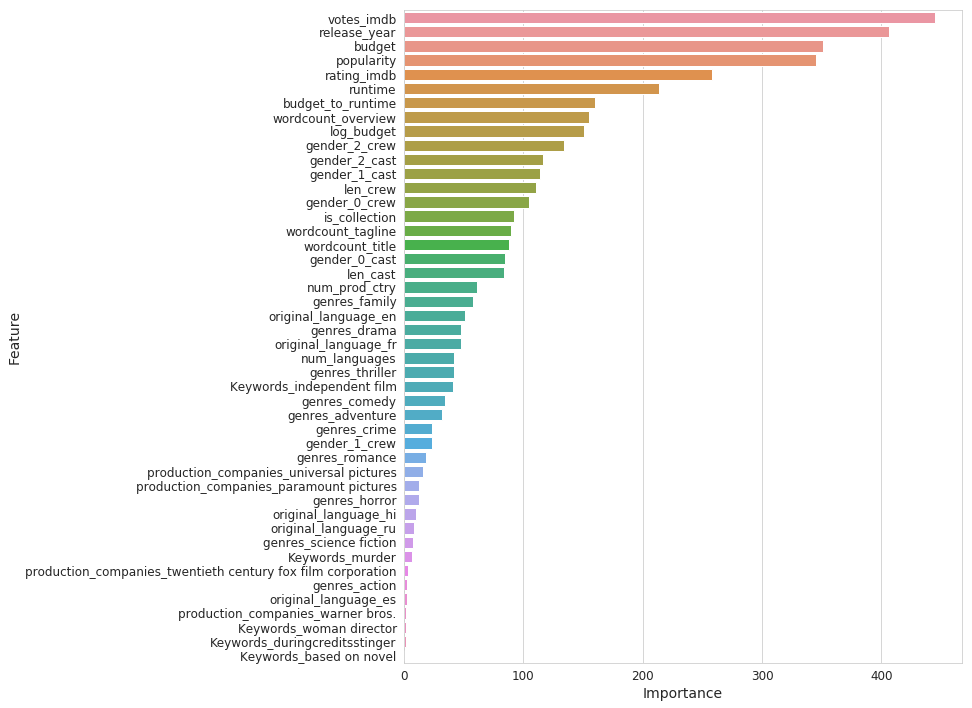

In [131]:
feat_imp = pd.DataFrame([X_train.columns, model_lgb.feature_importances_])
feat_imp = feat_imp.T
feat_imp.columns = ['Feature', 'Importance']
feat_imp = feat_imp.sort_values('Importance', ascending=False)
# feat_imp.set_index('Feature', inplace=True)

plt.figure(figsize=(10,12))
sns.barplot(x='Importance', y='Feature', data=feat_imp)

In [134]:
result = model_lgb.predict(X_test)
lgb_result = np.expm1(result)

**Submission score: 1.95705**
<br><br>

## XGBoost regressor

In [136]:
import xgboost as xgb
from xgboost.sklearn import XGBRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_squared_log_error
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone

In [137]:
xgb_params = {
#               'silent':1,
#               'objective': 'reg:linear', 
              'learning_rate': [0.005,0.01,0.05,0.1],  
              'n_estimators': [2000],
              'colsample_bytree': np.linspace(0.4,1,7),
              'subsample': np.linspace(0.4,1,7),
              'min_child_weight':np.arange(0.1,1,10),
              'reg_alpha': [0.005,0.01,0.05,0.1],
              'max_depth': [3,4,5,6], 
              'gamma': [10,20,30],
              'scale_pos_weight': [0.1,0.5,1]
              }


n_iter = 20
xgb_random_search = RandomizedSearchCV(XGBRegressor(), 
                                       param_distributions=xgb_params,
                                       n_iter=n_iter, 
                                       cv=5, 
                                       scoring='neg_mean_squared_error', 
                                       n_jobs=-1,
                                       iid=False)


In [138]:
xgb_random_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, error_score='raise-deprecating',
          estimator=XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, importance_type='gain',
       learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
       nthread=None, objective='reg:linear', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
       subsample=1),
          fit_params=None, iid=False, n_iter=20, n_jobs=-1,
          param_distributions={'learning_rate': [0.005, 0.01, 0.05, 0.1], 'n_estimators': [2000], 'colsample_bytree': array([0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]), 'subsample': array([0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]), 'min_child_weight': array([0.1]), 'reg_alpha': [0.005, 0.01, 0.05, 0.1], 'max_depth': [3, 4, 5, 6], 'gamma': [10, 20, 30], 'scale_pos_weight': [0.1, 0.5, 1]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
    

In [139]:
report(xgb_random_search.cv_results_)

Model with rank: 1
Mean validation score: 2.018
Parameters: {'subsample': 0.8999999999999999, 'scale_pos_weight': 0.1, 'reg_alpha': 0.01, 'n_estimators': 2000, 'min_child_weight': 0.1, 'max_depth': 6, 'learning_rate': 0.005, 'gamma': 20, 'colsample_bytree': 0.5}

Model with rank: 2
Mean validation score: 2.018
Parameters: {'subsample': 0.5, 'scale_pos_weight': 0.1, 'reg_alpha': 0.05, 'n_estimators': 2000, 'min_child_weight': 0.1, 'max_depth': 3, 'learning_rate': 0.01, 'gamma': 20, 'colsample_bytree': 0.6}

Model with rank: 3
Mean validation score: 2.020
Parameters: {'subsample': 0.8999999999999999, 'scale_pos_weight': 1, 'reg_alpha': 0.05, 'n_estimators': 2000, 'min_child_weight': 0.1, 'max_depth': 3, 'learning_rate': 0.05, 'gamma': 30, 'colsample_bytree': 1.0}



In [156]:
xgb_params_grid = {
    #               'silent':1,
    #               'objective': 'reg:linear', 
                  'learning_rate': [0.01],  
                  'n_estimators': [2000],
                  'colsample_bytree': [0.4,0.5,0.6],
                  'subsample': [0.6],
                  'min_child_weight':[0.1],
                  'reg_alpha': [0.01],
                  'max_depth': [4], 
                  'gamma': [20],
                  'scale_pos_weight': [0.6,0.8,1]
                  }


xgb_grid_search = GridSearchCV(XGBRegressor(), 
                               param_grid=xgb_params_grid,
                               cv=5, 
                               scoring='neg_mean_squared_error',
                               n_jobs=-1,
                               iid=False)


In [157]:
xgb_grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, importance_type='gain',
       learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
       nthread=None, objective='reg:linear', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
       subsample=1),
       fit_params=None, iid=False, n_jobs=-1,
       param_grid={'learning_rate': [0.01], 'n_estimators': [2000], 'colsample_bytree': [0.4, 0.5, 0.6], 'subsample': [0.6], 'min_child_weight': [0.1], 'reg_alpha': [0.01], 'max_depth': [4], 'gamma': [20], 'scale_pos_weight': [0.6, 0.8, 1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=0)

In [158]:
report(xgb_grid_search.cv_results_)

Model with rank: 1
Mean validation score: 2.007
Parameters: {'colsample_bytree': 0.4, 'gamma': 20, 'learning_rate': 0.01, 'max_depth': 4, 'min_child_weight': 0.1, 'n_estimators': 2000, 'reg_alpha': 0.01, 'scale_pos_weight': 0.6, 'subsample': 0.6}

Model with rank: 1
Mean validation score: 2.007
Parameters: {'colsample_bytree': 0.4, 'gamma': 20, 'learning_rate': 0.01, 'max_depth': 4, 'min_child_weight': 0.1, 'n_estimators': 2000, 'reg_alpha': 0.01, 'scale_pos_weight': 0.8, 'subsample': 0.6}

Model with rank: 1
Mean validation score: 2.007
Parameters: {'colsample_bytree': 0.4, 'gamma': 20, 'learning_rate': 0.01, 'max_depth': 4, 'min_child_weight': 0.1, 'n_estimators': 2000, 'reg_alpha': 0.01, 'scale_pos_weight': 1, 'subsample': 0.6}



In [159]:
model_xgb = XGBRegressor(**xgb_grid_search.best_params_, n_jobs=-1)

In [160]:
model_xgb.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.4, gamma=20, importance_type='gain',
       learning_rate=0.01, max_delta_step=0, max_depth=4,
       min_child_weight=0.1, missing=None, n_estimators=2000, n_jobs=-1,
       nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0.01, reg_lambda=1, scale_pos_weight=0.6, seed=None,
       silent=True, subsample=0.6)

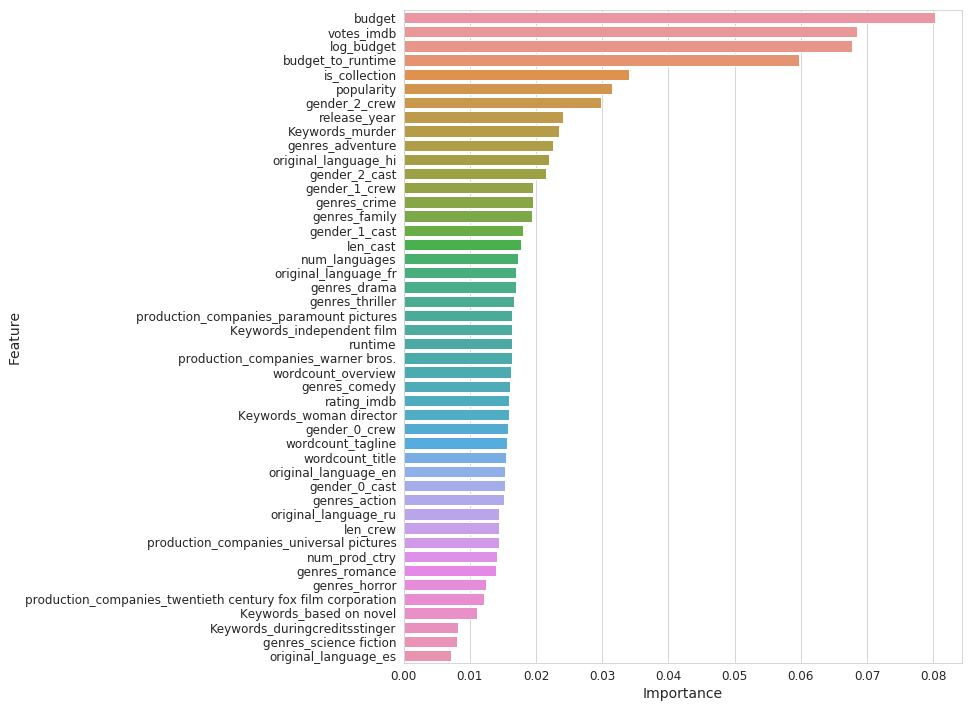

In [161]:
feat_imp = pd.DataFrame([X_train.columns, model_xgb.feature_importances_])
feat_imp = feat_imp.T
feat_imp.columns = ['Feature', 'Importance']
feat_imp = feat_imp.sort_values('Importance', ascending=False)

plt.figure(figsize=(10,12))
sns.barplot(x='Importance', y='Feature', data=feat_imp[feat_imp['Importance']>0])

In [162]:
result = model_xgb.predict(X_test)
xgb_result = np.expm1(result)

**Submission score: 1.96407**
<br><br>

## Stacking LightGBM & XGBoost models

In [164]:
class AveragingModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, models):
        self.models = models
        
    def fit(self, X, y):
        self.models_ = [clone(x) for x in self.models]
        
        for model in self.models_:
            model.fit(X, y)

        return self
    
    def predict(self, X):
        predictions = np.column_stack([
            model.predict(X) for model in self.models_
        ])
        return np.mean(predictions, axis=1)   

In [165]:
model_lgb = LGBMRegressor(**lgb_grid_search.best_params_, n_jobs=-1)
model_xgb = XGBRegressor(**xgb_grid_search.best_params_, n_jobs=-1)

In [166]:
averaged_models = AveragingModels(models = (model_lgb, model_xgb))

score = rmse_cv(averaged_models, X_train, y_train)
print(" Averaged base models score: {:.4f} ({:.4f})".format(score.mean(), score.std()))

 Averaged base models score: 1.9979 (0.1118)


In [168]:
averaged_models.fit(X_train.values, y_train.values)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


AveragingModels(models=(LGBMRegressor(bagging_fraction=0.6, bagging_freq=4, boosting_type='gbdt',
       class_weight=None, colsample_bytree=1.0, feature_fraction=0.5,
       importance_type='split', learning_rate=0.02, max_depth=4,
       min_child_samples=6, min_child_weight=0.001, min_split_gain=0.5,
       n_es...  reg_alpha=0.01, reg_lambda=1, scale_pos_weight=0.6, seed=None,
       silent=True, subsample=0.6)))

In [172]:
result = averaged_models.predict(X_test.values)
avg_result = np.expm1(result)

**Submission score: 1.94524**<br><br>

## Stacking LightGBM & XGBoost models with Neural Network as metal model

In [174]:
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
import keras
from keras import Model
from keras.layers import Input, Dense, Activation, regularizers
from keras.callbacks import EarlyStopping
from keras.models import clone_model

Using TensorFlow backend.


In [175]:
early_stopping = EarlyStopping(patience=10)
EPOCHS = 500
BATCH_SIZE = 500

In [176]:
class StackingAveragedModels_NN(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, base_models, meta_model, n_folds=5):
        self.base_models = base_models
        self.meta_model = meta_model
        self.n_folds = n_folds
   
    def fit(self, X, y):
        self.base_models_ = [list() for x in self.base_models]
        self.meta_model_ = clone_model(self.meta_model)
        kfold = KFold(n_splits=self.n_folds, shuffle=True, random_state=100)
        
        # Train cloned base models then create out-of-fold predictions
        # that are needed to train the cloned meta-model
        out_of_fold_predictions = np.zeros((X.shape[0], len(self.base_models)))
        for i, model in enumerate(self.base_models):

            for train_index, holdout_index in kfold.split(X, y):
                instance = clone(model)
                self.base_models_[i].append(instance)
                instance.fit(X.values[train_index], y.values.squeeze()[train_index])
                y_pred = instance.predict(X.values[holdout_index])
                out_of_fold_predictions[holdout_index, i] = y_pred
                
        # Meta-model use the out-of-fold predictions as new feature
        out_of_fold_predictions = StandardScaler().fit_transform(out_of_fold_predictions)
        self.meta_model_.compile(loss='mean_squared_error',
                                 optimizer=keras.optimizers.Adam(lr=0.001),
                                 metrics=['mean_squared_error'])
        self.meta_model_.fit(out_of_fold_predictions, y,
                             validation_split = 0.2,
                             epochs=EPOCHS,
                             shuffle=True,
                             verbose=1,
                             callbacks=[early_stopping])
        return self
   
    # Do the predictions using all base models on the test data 
    # and use the averaged predictions as the input features for meta-model
    def predict(self, X):
        meta_features = np.column_stack([
            np.column_stack([model.predict(X) for model in base_models]).mean(axis=1)
            for base_models in self.base_models_ ])
        meta_features = StandardScaler().fit_transform(meta_features)
        return self.meta_model_.predict(meta_features)

In [177]:
kernel_reg = regularizers.l1(1e-3)

main_input = Input(shape=(2,), name='main_input')

layer0 = Dense(256, kernel_regularizer=kernel_reg)(main_input)
layer0 = Activation('relu')(layer0)

layer1 = Dense(256, kernel_regularizer=kernel_reg)(layer0)
layer1 = Activation('relu')(layer1)

layer2 = Dense(256, kernel_regularizer=kernel_reg)(layer1)
layer2 = Activation('relu')(layer2)

main_output = Dense(1, name='main_output')(layer2)

model_nn = Model(inputs=main_input, outputs=main_output)

model_nn.compile(loss='mean_squared_error',
                 optimizer=keras.optimizers.Adam(lr=0.001),
                 metrics=['mean_squared_error'])

Instructions for updating:
Colocations handled automatically by placer.


In [178]:
model_lgb = LGBMRegressor(**lgb_grid_search.best_params_, n_jobs=-1)
model_xgb = XGBRegressor(**xgb_grid_search.best_params_, n_jobs=-1)

In [179]:
stacked_averaged_models = StackingAveragedModels_NN(base_models = [model_lgb, model_xgb],
                                                    meta_model =  model_nn)

In [180]:
stacked_averaged_models.fit(X_train, y_train)

Instructions for updating:
Use tf.cast instead.
Train on 2400 samples, validate on 600 samples
Epoch 1/500
2400/2400 [==============================] - 1s 242us/step - loss: 80.2880 - mean_squared_error: 74.5686 - val_loss: 10.4596 - val_mean_squared_error: 5.7035
Epoch 2/500
2400/2400 [==============================] - 0s 95us/step - loss: 9.0492 - mean_squared_error: 4.6022 - val_loss: 7.9046 - val_mean_squared_error: 3.7044
Epoch 3/500
2400/2400 [==============================] - 0s 91us/step - loss: 8.3819 - mean_squared_error: 4.3495 - val_loss: 7.5036 - val_mean_squared_error: 3.6302
Epoch 4/500
2400/2400 [==============================] - 0s 91us/step - loss: 8.3702 - mean_squared_error: 4.6281 - val_loss: 7.0487 - val_mean_squared_error: 3.4378
Epoch 5/500
2400/2400 [==============================] - 0s 100us/step - loss: 8.0313 - mean_squared_error: 4.5307 - val_loss: 6.9097 - val_mean_squared_error: 3.5138
Epoch 6/500
2400/2400 [==============================] - 0s 114us/step

Epoch 48/500
2400/2400 [==============================] - 0s 92us/step - loss: 4.8570 - mean_squared_error: 4.3055 - val_loss: 4.4102 - val_mean_squared_error: 3.8695
Epoch 49/500
2400/2400 [==============================] - 0s 89us/step - loss: 4.8755 - mean_squared_error: 4.3423 - val_loss: 3.9309 - val_mean_squared_error: 3.4036
Epoch 50/500
2400/2400 [==============================] - 0s 90us/step - loss: 4.8138 - mean_squared_error: 4.2960 - val_loss: 4.1333 - val_mean_squared_error: 3.6147
Epoch 51/500
2400/2400 [==============================] - 0s 95us/step - loss: 4.7952 - mean_squared_error: 4.2935 - val_loss: 3.8730 - val_mean_squared_error: 3.3836
Epoch 52/500
2400/2400 [==============================] - 0s 77us/step - loss: 4.7611 - mean_squared_error: 4.2733 - val_loss: 3.8651 - val_mean_squared_error: 3.3869
Epoch 53/500
2400/2400 [==============================] - 0s 72us/step - loss: 4.8299 - mean_squared_error: 4.3578 - val_loss: 3.8441 - val_mean_squared_error: 3.381

StackingAveragedModels_NN(base_models=[LGBMRegressor(bagging_fraction=0.6, bagging_freq=4, boosting_type='gbdt',
       class_weight=None, colsample_bytree=1.0, feature_fraction=0.5,
       importance_type='split', learning_rate=0.02, max_depth=4,
       min_child_samples=6, min_child_weight=0.001, min_split_gain=0.5,
      ...  reg_alpha=0.01, reg_lambda=1, scale_pos_weight=0.6, seed=None,
       silent=True, subsample=0.6)],
             meta_model=<keras.engine.training.Model object at 0x1415cfcc0>,
             n_folds=5)

In [181]:
result = stacked_averaged_models.predict(X_test.values)

**Submission score: 1.98404**<br><br>

Using NN as the meta model does not improve the model. This could be due to insufficient training data, which makes the NN not applicable to the unseen test data. A few techniques were adopted to prevent overfitting, such as regularizaion, early stopping, dropout, etc., but the benefits to this dataset are very limited. <br><br>

### End of document